# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv('petrol.csv')
df.shape

(48, 5)

In [2]:
df.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

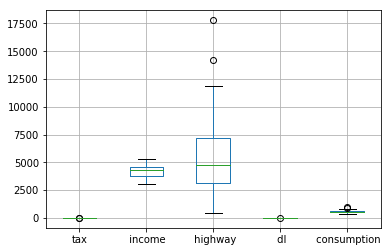

In [3]:
df.boxplot()
# List all the outliers available. Majority outliers are in highway 

In [4]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
df2=df[~((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).any(axis=1)]

df2.shape


(43, 5)

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [5]:
corr1 = df2[' consumption'].corr(df2['tax'])

print('Consumption vs tax',corr1)

corr2 = df2[' consumption'].corr(df2[' highway'])

print('Consumption vs Highway',corr2)

corr3 = df2[' consumption'].corr(df2[' income'])

print('Consumption vs Income',corr3)

corr4 = df2[' consumption'].corr(df2[' dl'])

print('Consumption vs Drivers',corr4)
df2.corr()

Consumption vs tax -0.44611573625825673
Consumption vs Highway 0.03430885028863911
Consumption vs Income -0.34732558868059754
Consumption vs Drivers 0.6117880063947397


,tax,income,highway,dl,consumption
tax,1.000000,-0.109537,-0.390602,-0.314702,-0.446116
income,-0.109537,1.000000,0.051169,0.150689,-0.347326
highway,-0.390602,0.051169,1.000000,-0.016193,0.034309
dl,-0.314702,0.150689,-0.016193,1.000000,0.611788
consumption,-0.446116,-0.347326,0.034309,0.611788,1.000000


Consumption vs Drivers seem to high positive correlation compared to others. Below gives the Visual representation of correlation between different variables

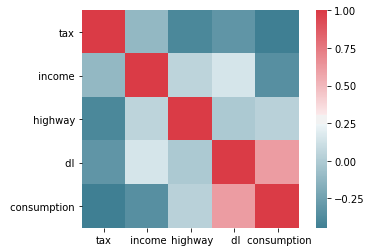

In [6]:
correx = df2.corr()
sns.heatmap(correx,None, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=None)


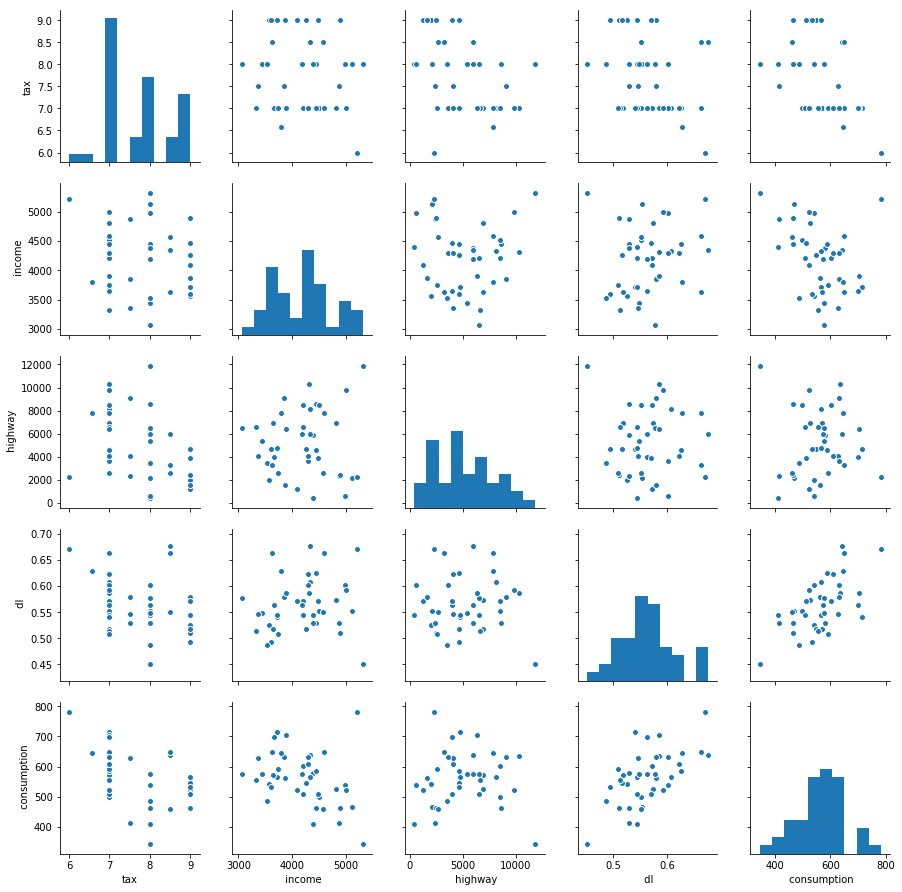

In [7]:
sns.pairplot(df2)

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [8]:
df2.info()

Y = df2[[' consumption']]
X = df2[['tax',' dl']]

X.shape, Y.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 47
Data columns (total 5 columns):
tax             43 non-null float64
 income         43 non-null int64
 highway        43 non-null int64
 dl             43 non-null float64
 consumption    43 non-null int64
dtypes: float64(2), int64(3)
memory usage: 3.3 KB


((43, 2), (43, 1))

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((34, 2), (9, 2), (34, 1), (9, 1))

# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [10]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,Y_train)

print('Coefficients: \n ', lm.coef_)

Coefficients: 
  [[-35.93449939 713.44996929]]


In [30]:
X.columns

cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

AssertionError: 1 columns passed, passed data had 2 columns

Text(0,0.5,'Predicted Y')

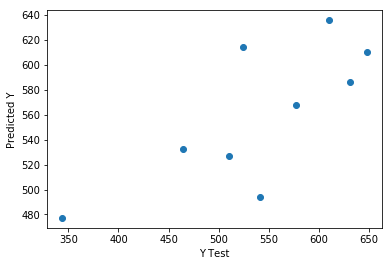

In [18]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [19]:
# calculate these metrics by hand!

import numpy as np
from sklearn import metrics

predictions=lm.predict(X_test)


print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
r_squared = metrics.r2_score(Y_test,predictions)
print('RSquare', r_squared)
lm.score(X_train,Y_train)

MAE: 52.60228603077737
MSE: 4145.393327234515
RMSE: 64.38472899092233
RSquare 0.4785636380907783


0.39909756686783393

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [20]:
Ym = df2[[' consumption']]
Xm = df2[['tax',' dl',' highway',' income']]

Xm.shape, Ym.shape

((43, 4), (43, 1))

In [21]:
from sklearn.model_selection import train_test_split
Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm, Ym, test_size=0.2, random_state=45)

from sklearn.linear_model import LinearRegression
lms = LinearRegression()
lms.fit(Xm_train,Ym_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Question 9: Print the coefficients of the multilinear regression model

In [22]:
mpredictions = lms.predict( Xm_test)

print('Coefficients: \n ', lms.coef_)
print('MAE:', metrics.mean_absolute_error(Ym_test, mpredictions))
print('MSE:', metrics.mean_squared_error(Ym_test, mpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ym_test, mpredictions)))
r_squared = metrics.r2_score(Ym_test,mpredictions)
print('RSquare', r_squared)
lms.score(Xm_train,Ym_train) 

Coefficients: 
  [[-3.24207247e+01  1.09925248e+03 -1.35932449e-03 -8.13155584e-02]]
MAE: 29.467478715521224
MSE: 1501.3040414685215
RMSE: 38.7466649076862
RSquare 0.8111555513056216


0.5963048837387734

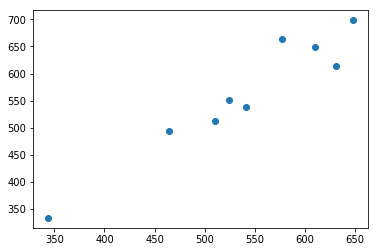

In [23]:
plt.scatter(Ym_test,mpredictions)

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

Yes, R Squared Value increases if we increase the no.of independent variables to our analysis. If defintely increased the reliability and accuracy of the model